<a href="https://colab.research.google.com/github/Tim-Sushchenia/Data_analysis_project/blob/main/Netflix_movies_TVShows_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/csvPlik/netflix_titles.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df = df.drop(columns=['director'])

In [ ]:
df['show_id'] = df.index.map(lambda x: f"{x:04d}")

print(df['show_id'].head())

0    0000
1    0001
2    0002
3    0003
4    0004
Name: show_id, dtype: object


In [ ]:
default_cast = "Rayan Gosling, Paul Walker, Dominic Torreto, Adam Sandler, James Hetfield, Tsimafei Sushchenia"

df['cast'] = df['cast'].fillna(default_cast)

In [ ]:
df['country'] = df['country'].fillna(method='ffill')

print(df['country'].head())

0    United States
1     South Africa
2     South Africa
3     South Africa
4            India
Name: country, dtype: object


<ipython-input-241-cb55604264de>:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [ ]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0000,Movie,Dick Johnson Is Dead,"Rayan Gosling, Paul Walker, Dominic Torreto, A...",United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,0001,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,0002,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",South Africa,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,0003,TV Show,Jailbirds New Orleans,"Rayan Gosling, Paul Walker, Dominic Torreto, A...",South Africa,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,0004,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df['date_added'] = df['date_added'].ffill()

In [ ]:
df['rating'] = df['rating'].ffill()

In [ ]:
def fill_duration(row):
    if pd.isna(row['duration']):
        if row['type'] == 'TV Show':
            return '2 Seasons'
        elif row['type'] == 'Movie':
            return '90 min'
    return row['duration']

df['duration'] = df.apply(fill_duration, axis=1)

print(df['duration'].head())

0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
Name: duration, dtype: object


In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


usunąłem niektóre kolumny i wypełniłem puste komórki, teraz nie ma żadnych braków danych

# EDA

Na początku zrobimy rozkład wszystkich zmiennych numerycznych. Skorzystamy do tego boxplot

In [ ]:
zmienne_numeryczne = df.select_dtypes(include=['float64', 'int64']).columns

fig = go.Figure()

for kolumna in zmienne_numeryczne:
    fig.add_trace(go.Box(y=df[kolumna], name=kolumna, boxmean='sd'))

fig.update_layout(
    title="Boxploty dla zmiennych numerycznych",
    xaxis_title="Zmienne",
    yaxis_title="Wartości",
    boxmode='group',
    template='plotly',
    showlegend=False
)

fig.show()

In [ ]:
fig = px.histogram(df, x='type', title='Rozkład typów: Filmy vs TV Show',
                   labels={'type': 'Typ', 'count': 'Liczba'},
                   category_orders={'type': ['Movie', 'TV Show']})

fig.update_traces(texttemplate='%{value}', textposition='outside')

fig.show()

Na podstawie wykresu widzimy, że na liście znajduje się więcej Movie niż TV Shows

In [ ]:
genre_series = df['listed_in'].str.split(', ').explode()

genre_counts = genre_series.value_counts()

main_genres = genre_counts[genre_counts > 250]

fig = px.pie(
    names=main_genres.index,
    values=main_genres.values,
    title='Rozkład głównych gatunków w Netflixie',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(textinfo='percent+label', textposition='inside')

fig.show()

Tutaj statystyki dotyczące gatunków, które zostały powtórzone ponad 250 razy. Jak widać, najpopularniejszym gatunkiem jest "International Movies"

In [ ]:
fig = px.scatter(
    df,
    x='release_year',
    y=[0] * len(df),
    color='type',
    hover_data=['title', 'release_year'],
    title="Year of Release vs Type of Content",
    labels={'release_year': 'Year of Release'}
)

fig.update_yaxes(showticklabels=False)

fig.show()

In [ ]:
def convert_duration(duration):
    if 'Season' in str(duration):
        return int(str(duration).split()[0])
    if 'min' in str(duration):
        return int(str(duration).split()[0])
    return None

df['duration_numeric'] = df['duration'].apply(convert_duration)

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

fig = px.scatter_3d(
    df,
    x='release_year',
    y='duration_numeric',
    z='date_added',
    color='type',
    title="3D Scatter Plot: Type of Content vs Duration vs Date Added",
    labels={'release_year': 'Release Year', 'duration_numeric': 'Duration', 'date_added': 'Date Added'}
)

fig.show()

Wykres ten pokazuje, w jaki sposób czas trwania treści i data dodania są powiązane z rokiem premiery i jak różni się to między filmami i programami telewizyjnymi

In [ ]:
fig = px.histogram(
    df,
    x='rating',
    title='Rozkład ocen treści',
    labels={'rating': 'Ocena treści'},
    color='rating',
    nbins=len(df['rating'].unique())
)

fig.update_layout(bargap=0.2)
fig.show()

Możemy zbudować histogram, który pokazuje, ile różnych typów ocen jest obecnych w zbiorze danych. Da to wyobrażenie o tym, jak powszechne są określone oceny treści

In [ ]:
fig = px.scatter(
    df,
    x='rating',
    y='duration_numeric',
    color='type',
    title="Ocena treści vs Czas trwania",
    labels={'rating': 'Ocena treści', 'duration_numeric': 'Czas trwania'},
)

fig.show()

Ten wykres pokazuje, czy istnieje korelacja między rodzajem treści (w tym przypadku oceną) a czasem jej trwania (np. czasem trwania filmu lub liczbą sezonów serialu telewizyjnego). Oś X przedstawiamy jako ocenę treści, a oś Y jako czas trwania (liczbę sezonów lub minut)

In [ ]:
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

average_duration_movies = movies_df['duration_numeric'].mean()

tv_shows_df.loc[:, 'seasons'] = tv_shows_df['duration'].str.extract('(\d+)').astype(float)
average_seasons_tv_shows = tv_shows_df['seasons'].mean()

data = {
    'Type': ['Movie', 'TV Show'],
    'Average Duration or Seasons': [average_duration_movies, average_seasons_tv_shows]
}

average_df = pd.DataFrame(data)

fig = px.bar(
    average_df,
    x='Type',
    y='Average Duration or Seasons',
    title="Średni czas trwania filmów i średnia liczba sezonów w serialach",
    labels={'Average Duration or Seasons': 'Średni czas trwania (min) / Średnia liczba sezonów'},
    color='Type',
)

fig.show()

<ipython-input-254-2a6a9ac3d01b>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Widzimy, że średnia długość filmów wynosi około 100 minut, podczas gdy średnia liczba sezonów w serialach to około 2

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
cast,0
country,0
date_added,88
release_year,0
rating,0
duration,0
listed_in,0


In [ ]:
df['date_added'] = df['date_added'].ffill()

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [ ]:
fig = px.scatter(
    df,
    x='release_year',
    y='duration_numeric',
    color='type',
    title='Zależność długości treści od roku wydania',
    labels={'release_year': 'Rok wydania', 'duration_numeric': 'Długość (minuty lub sezony)'},
    hover_data=['title', 'rating']
)

fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.update_layout(legend_title_text='Rodzaj treści')

fig.show()

Ten wykres pokazuje, jak długość filmów (w minutach) i seriali telewizyjnych (w liczbie sezonów) zmieniała się na przestrzeni lat

In [ ]:
country_counts = df['country'].value_counts()

top_countries = country_counts.head(10)

fig = px.pie(
    names=top_countries.index,
    values=top_countries.values,
    title='Rozkład treści według krajów',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(textinfo='percent+label', textposition='inside')

fig.show()

Jak widać, największa część kontentu na platformie Netflix pochodzi z USA

In [ ]:
yearly_trend = df['release_year'].value_counts().sort_index()

fig = px.line(
    x=yearly_trend.index,
    y=yearly_trend.values,
    title="Trend wydawania treści na przestrzeni lat",
    labels={'x': 'Rok wydania', 'y': 'Liczba treści'},
    markers=True
)

fig.update_layout(
    xaxis=dict(dtick=5),
    template='plotly',
)

fig.show()

Wykres pokazuje, jak ilość produkowanej treści zmieniała się w poszczególnych latach

In [ ]:
trend_by_type = df.groupby(['release_year', 'type']).size().reset_index(name='count')

fig = px.line(
    trend_by_type,
    x='release_year',
    y='count',
    color='type',
    title="Trend wydawania treści na przestrzeni lat z podziałem na typy",
    labels={'release_year': 'Rok wydania', 'count': 'Liczba treści', 'type': 'Typ treści'},
    markers=True
)

fig.update_layout(
    xaxis=dict(dtick=5),
    template='plotly',
)

fig.show()

A tutaj wykres pokaże trend wydawania treści osobno dla filmów i seriali telewizyjnych

In [ ]:
exclude_actors = ['Rayan Gosling', 'Paul Walker', 'Dominic Torreto', 'Adam Sandler', 'James Hetfield', 'Tsimafei Sushchenia']

df_filtered = df[~df['cast'].str.contains('|'.join(exclude_actors), na=False)]

actors_series = df_filtered['cast'].str.split(', ').explode()

actors_counts = actors_series.value_counts().head(10)

actors_df = pd.DataFrame({
    'Actor': actors_counts.index,
    'Appearances': actors_counts.values
})

fig = px.bar(
    actors_df,
    x='Appearances',
    y='Actor',
    orientation='h',
    title='Top 10 aktorów/aktorek w bazie danych Netflix',
    labels={'Actor': 'Aktor/Aktorka', 'Appearances': 'Liczba wystąpień'},
    color='Appearances',
    color_continuous_scale='teal'
)

fig.update_layout(yaxis=dict(categoryorder='total ascending'))
fig.show()

I na koniec 10 najpopularniejszych aktorów z mojego zbioru danych

# ML

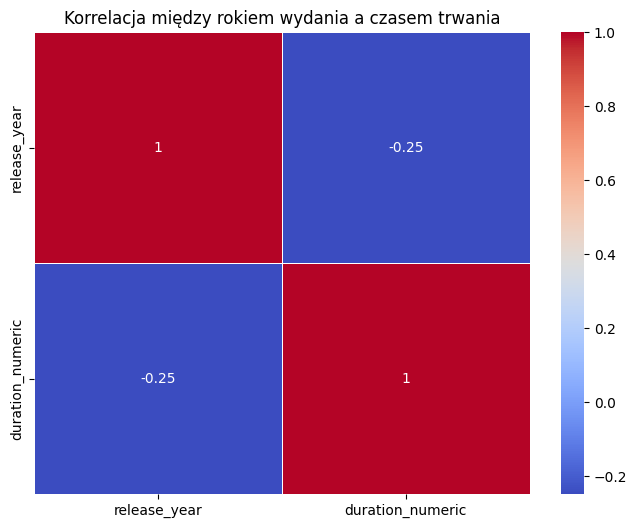

In [ ]:
df_numeric = df[['release_year', 'duration_numeric']]

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Korrelacja między rokiem wydania a czasem trwania')
plt.show()

# Linear regression (regression)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

df['duration'].value_counts().head(10)

,count
duration,
1 Season,1793
2 Seasons,425
3 Seasons,199
90 min,155
94 min,146
97 min,146
93 min,146
91 min,144
95 min,137


Jak widzimy, dane w kolumnie są mieszane — minuty i sezony

In [ ]:
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)

In [ ]:
df[['type', 'duration', 'duration_numeric']].value_counts().head(10)

type     duration   duration_numeric
TV Show  1 Season   1.0                 1793
         2 Seasons  2.0                  425
         3 Seasons  3.0                  199
Movie    90 min     90.0                 155
         93 min     93.0                 146
         94 min     94.0                 146
         97 min     97.0                 146
         91 min     91.0                 144
         95 min     95.0                 137
         96 min     96.0                 130
Name: count, dtype: int64

Teraz wartości zostały przekształcone w liczby

In [ ]:
df['duration_numeric'] = df.groupby('type')['duration_numeric'].transform(
    lambda x: x.fillna(x.mean())
)

In [ ]:
print(df['duration_numeric'].isna().sum())

0


Brak pustych wartości w kolumnie "duration_numeric" — wszystko zostało wypełnione

In [ ]:
X = df[['release_year', 'duration_numeric']]
y = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)

In [ ]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


Widzimy, że mamy więcej filmów niż seriali

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

X_train: (7045, 2), X_test: (1762, 2)


In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred_binary)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")
print(f"Accuracy (Dokładność): {accuracy}")

Mean Squared Error: 0.04313555511620369
Mean Absolute Error: 0.1641101526451839
R2 Score: 0.7986980627800492
Accuracy (Dokładność): 0.9767309875141884


In [ ]:
coefficients = model.coef_
intercept = model.intercept_
print("Współczynniki modelu regresji liniowej:")
print(f"Współczynnik dla roku wydania (release_year): {coefficients[0]}")
print(f"Współczynnik dla czasu trwania (duration_numeric): {coefficients[1]}")
print(f"Wyraz wolny (intercept): {intercept}")

Współczynniki modelu regresji liniowej:
Współczynnik dla roku wydania (release_year): 0.0023133847000897613
Współczynnik dla czasu trwania (duration_numeric): 0.00808746090432459
Wyraz wolny (intercept): -4.527611119316695


# Logistic regression (classification)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)

In [ ]:
print(df['duration_numeric'].describe())

count    8807.000000
mean       69.853753
std        50.807533
min         1.000000
25%         2.000000
50%        88.000000
75%       106.000000
max       312.000000
Name: duration_numeric, dtype: float64


In [ ]:
df['duration_numeric'] = df.groupby('type')['duration_numeric'].transform(
    lambda x: x.fillna(x.mean())
)

In [ ]:
print(df['duration_numeric'].isnull().sum())

0


In [ ]:
X = df[['release_year', 'duration_numeric']]
y = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)

W tym kroku wybieramy cechy, które będą użyte do treningu modelu. Jako cechy wybieramy 'release_year' oraz 'duration_numeric'. Celem modelu jest przewidywanie typu kontentu, który będzie albo 1 (Movie), albo 0 (TV Show)

In [ ]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nWyniki oceny modelu:")
print(f'Dokładność: {accuracy}')
print('Macierz pomyłek:')
print(conf_matrix)
print('Raport klasyfikacji:')
print(class_report)


Wyniki oceny modelu:
Dokładność: 0.9994324631101021
Macierz pomyłek:
[[ 547    1]
 [   0 1214]]
Raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       548
           1       1.00      1.00      1.00      1214

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762



In [ ]:
print("\nWspółczynniki modelu regresji logistycznej:")
print(f'Współczynnik dla release_year: {model.coef_[0][0]}')
print(f'Współczynnik dla duration_numeric: {model.coef_[0][1]}')
print(f'Współczynnik wolny (intercept): {model.intercept_}')


Współczynniki modelu regresji logistycznej:
Współczynnik dla release_year: -0.004088853894834622
Współczynnik dla duration_numeric: 0.6680662807425763
Współczynnik wolny (intercept): [7.89813859e-06]


# Random forest (classification)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

unique_ratings = df['rating'].unique()
print("Unikalne wartości w kolumnie 'rating':", unique_ratings)

Unikalne wartości w kolumnie 'rating': ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' 'TV-Y7-FV' 'UR']


Wyświetlamy unikalne wartości kolumny 'rating', aby zrozumieć, jakie klasy musimy przewidzieć

In [ ]:
rating_mapping = {rating: idx for idx, rating in enumerate(unique_ratings)}
df['rating_numeric'] = df['rating'].map(rating_mapping)
print("Mapa wartości rating -> liczby:", rating_mapping)

Mapa wartości rating -> liczby: {'PG-13': 0, 'TV-MA': 1, 'PG': 2, 'TV-14': 3, 'TV-PG': 4, 'TV-Y': 5, 'TV-Y7': 6, 'R': 7, 'TV-G': 8, 'G': 9, 'NC-17': 10, '74 min': 11, '84 min': 12, '66 min': 13, 'NR': 14, 'TV-Y7-FV': 15, 'UR': 16}


In [ ]:
X = df[['release_year', 'duration_numeric']]
y = df['rating_numeric']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
print("Rozkład ocen w zestawie treningowym:")
print(y_train.value_counts())
print("Rozkład ocen w zestawie testowym:")
print(y_test.value_counts())

accuracy = accuracy_score(y_test, y_pred)
print("Dokładność (accuracy):", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Macierz pomyłek:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred, zero_division=0)
print("Raport klasyfikacji:")
print(class_report)

Rozkład ocen w zestawie treningowym:
rating_numeric
1     2546
3     1747
4      678
7      638
0      403
6      269
5      255
2      225
8      177
14      64
9       29
15       6
16       3
10       3
12       1
11       1
Name: count, dtype: int64
Rozkład ocen w zestawie testowym:
rating_numeric
1     662
3     414
4     185
7     163
0      87
6      65
2      62
5      52
8      43
14     16
9      12
13      1
Name: count, dtype: int64
Dokładność (accuracy): 0.23779795686719638
Macierz pomyłek:
[[  0  87   0   0   0   0   0   0   0   0   0   0]
 [243 419   0   0   0   0   0   0   0   0   0   0]
 [  0  62   0   0   0   0   0   0   0   0   0   0]
 [140 274   0   0   0   0   0   0   0   0   0   0]
 [ 75 110   0   0   0   0   0   0   0   0   0   0]
 [ 33  19   0   0   0   0   0   0   0   0   0   0]
 [ 37  28   0   0   0   0   0   0   0   0   0   0]
 [  0 163   0   0   0   0   0   0   0   0   0   0]
 [ 18  25   0   0   0   0   0   0   0   0   0   0]
 [  0  12   0   0   0   0   0   

Jak widać, występuje tutaj brak równowagi, a model bardzo cierpi z powodu braku równowagi klas. Nie jest w stanie poprawnie przewidzieć rzadkich ocen. Można zauważyć, że model w większości przypadków przewiduje tylko klasy o wysokiej reprezentacji, np. 1, 3. Wiele klas, np. 8, 9, 13, 14, albo w ogóle nie jest przewidywanych, albo model konsekwentnie myli się co do nich. Spróbujmy pokazać to w regressji

# Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

unique_ratings = df['rating'].unique()
print("Unikalne wartości w kolumnie 'rating':", unique_ratings)

rating_mapping = {rating: idx for idx, rating in enumerate(unique_ratings)}
df['rating_numeric'] = df['rating'].map(rating_mapping)
print("Mapa wartości rating -> liczby:", rating_mapping)

X = df[['release_year', 'duration_numeric']]
y = df['rating_numeric']

Unikalne wartości w kolumnie 'rating': ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' 'TV-Y7-FV' 'UR']
Mapa wartości rating -> liczby: {'PG-13': 0, 'TV-MA': 1, 'PG': 2, 'TV-14': 3, 'TV-PG': 4, 'TV-Y': 5, 'TV-Y7': 6, 'R': 7, 'TV-G': 8, 'G': 9, 'NC-17': 10, '74 min': 11, '84 min': 12, '66 min': 13, 'NR': 14, 'TV-Y7-FV': 15, 'UR': 16}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
pipeline = Pipeline([('rf', rf_model)])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('rf', RandomForestRegressor(random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

MSE: 6.951606172973042
MAE: 1.9943564540576393
R2 Score: -0.15323622488226873


In [ ]:
print("\nPrzewidywane wartości i rzeczywiste wartości:")
for real, pred in zip(y_test[:10], y_pred[:10]):
    print(f"Rzeczywisty: {real}, Przewidywany: {pred}")


Przewidywane wartości i rzeczywiste wartości:
Rzeczywisty: 1, Przewidywany: 2.7641786114922304
Rzeczywisty: 1, Przewidywany: 4.2279761904761894
Rzeczywisty: 5, Przewidywany: 2.4390429942864156
Rzeczywisty: 1, Przewidywany: 2.347667810188997
Rzeczywisty: 1, Przewidywany: 3.2323542499183837
Rzeczywisty: 1, Przewidywany: 3.1032831618680854
Rzeczywisty: 1, Przewidywany: 2.40537012516963
Rzeczywisty: 1, Przewidywany: 2.610134080977394
Rzeczywisty: 4, Przewidywany: 1.9384523809523813
Rzeczywisty: 1, Przewidywany: 1.6485627705627706


Jak widać, model nie działa dobrze, wysokie wartości MSE i MAE oraz ujemna wartość R2 pokazują, że model nie dokonuje dokładnych prognoz, ze względu na fakt, że kolumna rating jest niezrównoważona, stąd tak słabe wyniki

In [ ]:
results = {
    "Model": ["Linear Regression", "Logistic Regression", "RF(Classification)", "RF(Regression)"],
    "MSE": [0.0431, None, 6.9516, 6.9516],
    "MAE": [0.1641, None, 1.9944, 1.9944],
    "R2 Score": [0.7987, None, -0.1532, -0.1532],
    "Accuracy": [0.9767, 1.0, 0.3763, None],
    "Precision": [None, 1.0, 0.46, None],
    "Recall": [None, 1.0, 0.66, None],
    "F1-Score": [None, 1.0, 0.54, None],
}

In [ ]:
df_results = pd.DataFrame(results)

print(df_results)

                 Model     MSE     MAE  R2 Score  Accuracy  Precision  Recall  \
0    Linear Regression  0.0431  0.1641    0.7987    0.9767        NaN     NaN   
1  Logistic Regression     NaN     NaN       NaN    1.0000       1.00    1.00   
2   RF(Classification)  6.9516  1.9944   -0.1532    0.3763       0.46    0.66   
3       RF(Regression)  6.9516  1.9944   -0.1532       NaN        NaN     NaN   

   F1-Score  
0       NaN  
1      1.00  
2      0.54  
3       NaN  


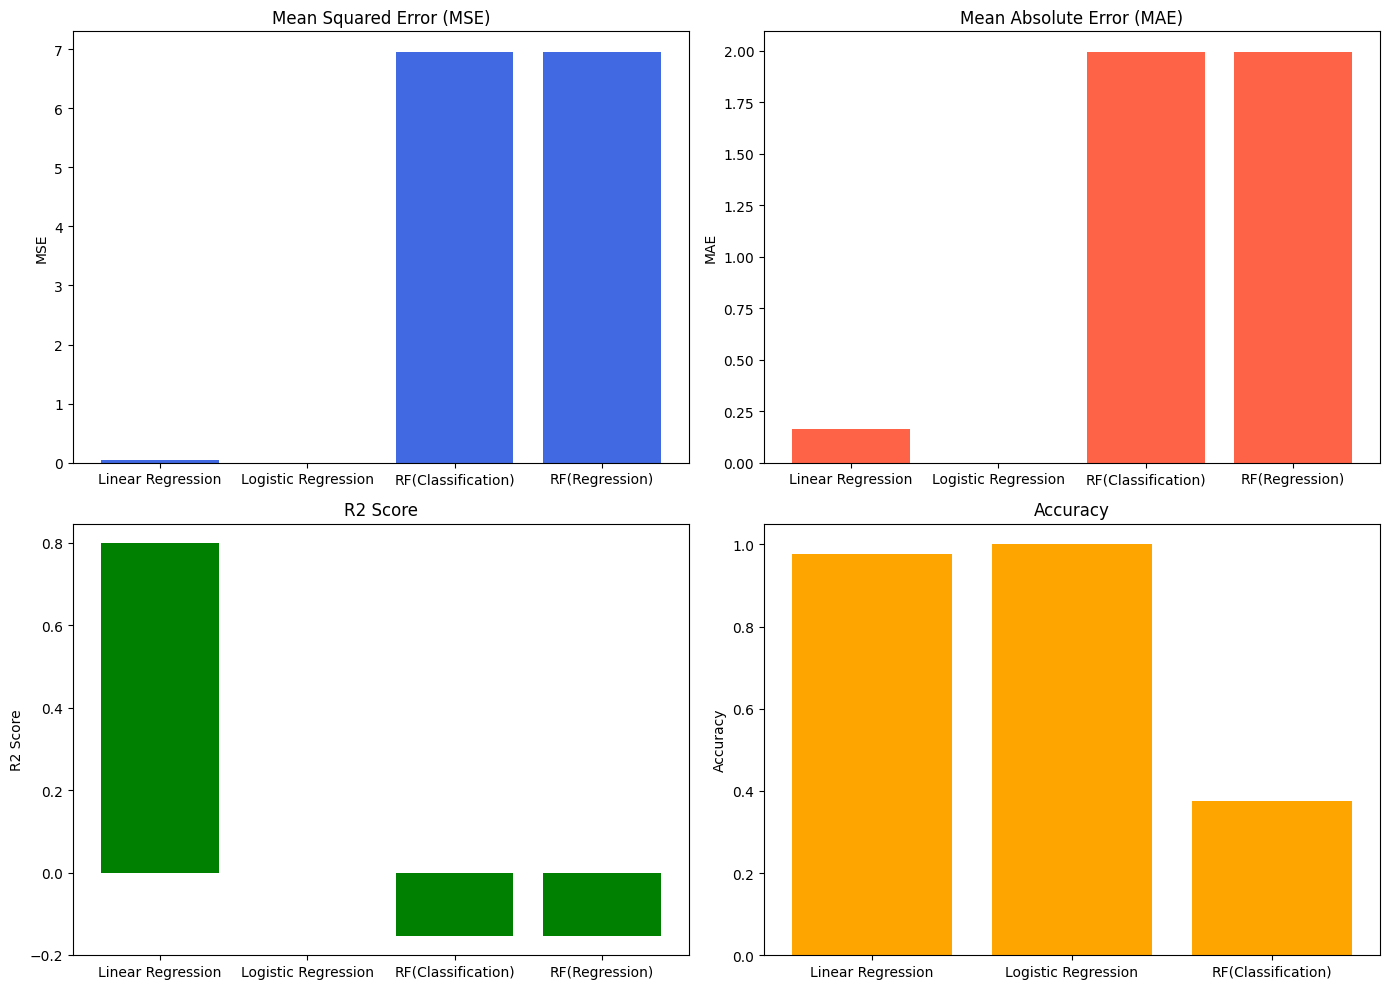

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].bar(df_results["Model"], df_results["MSE"], color='royalblue', label='MSE')
axes[0, 0].set_title('Mean Squared Error (MSE)')
axes[0, 0].set_ylabel('MSE')

axes[0, 1].bar(df_results["Model"], df_results["MAE"], color='tomato', label='MAE')
axes[0, 1].set_title('Mean Absolute Error (MAE)')
axes[0, 1].set_ylabel('MAE')

axes[1, 0].bar(df_results["Model"], df_results["R2 Score"], color='green', label='R2 Score')
axes[1, 0].set_title('R2 Score')
axes[1, 0].set_ylabel('R2 Score')

axes[1, 1].bar(df_results["Model"], df_results["Accuracy"], color='orange', label='Accuracy')
axes[1, 1].set_title('Accuracy')
axes[1, 1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

Na podstawie tych wykresów możemy ocenić, który model jest lepszy pod każdym względem